In [1]:

import warnings
warnings.filterwarnings('ignore')


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import add
import seaborn as sns

%matplotlib inline

In [3]:
#load the data
data = pd.read_csv('framingham.csv')
data.drop(['education'],axis=1,inplace=True)
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
data.shape

(4240, 15)

In [5]:

data.dropna(axis=0, inplace=True)

C:\Users\pavankalyan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


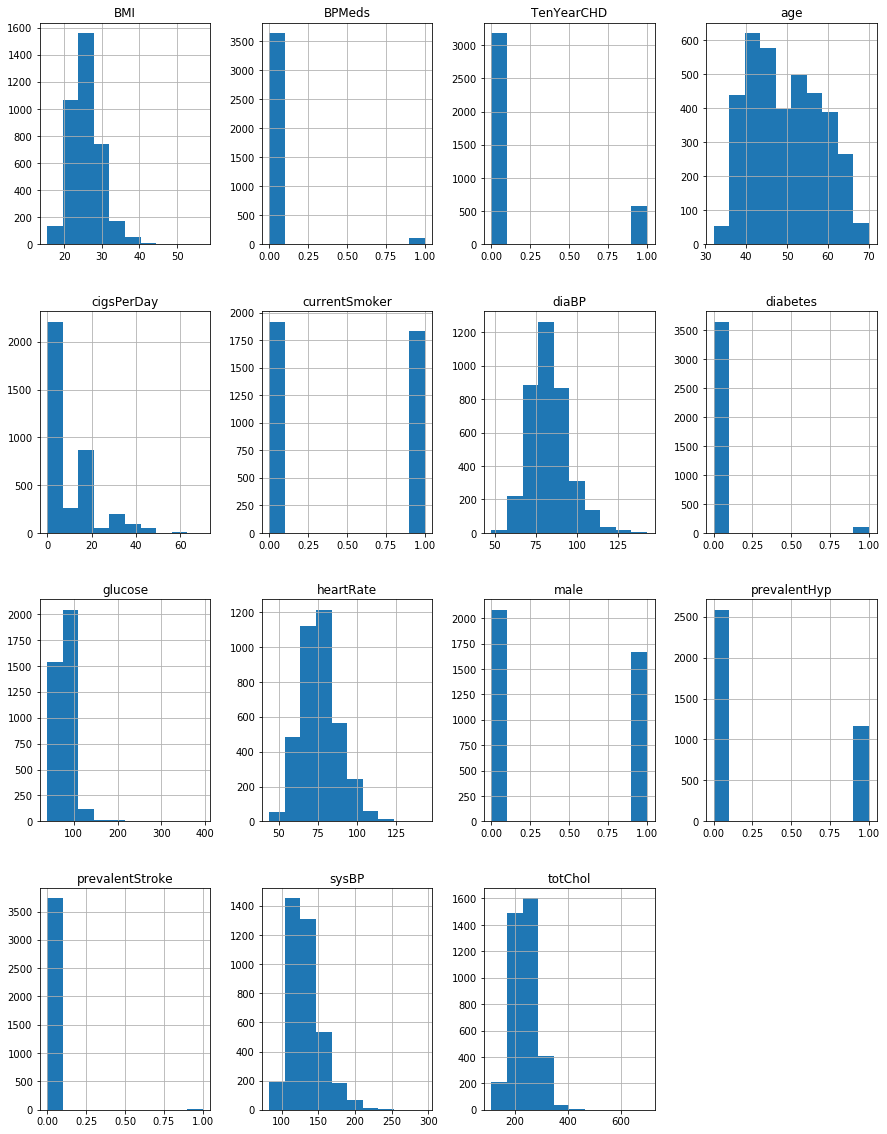

In [6]:

# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

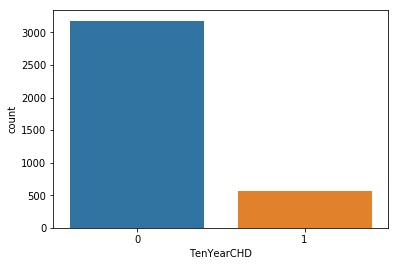

There are 3179 patients without heart disease and 572 patients with the disease


In [7]:
sns.countplot(x='TenYearCHD',data=data)
plt.show()
cases = data.TenYearCHD.value_counts()
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with the disease")

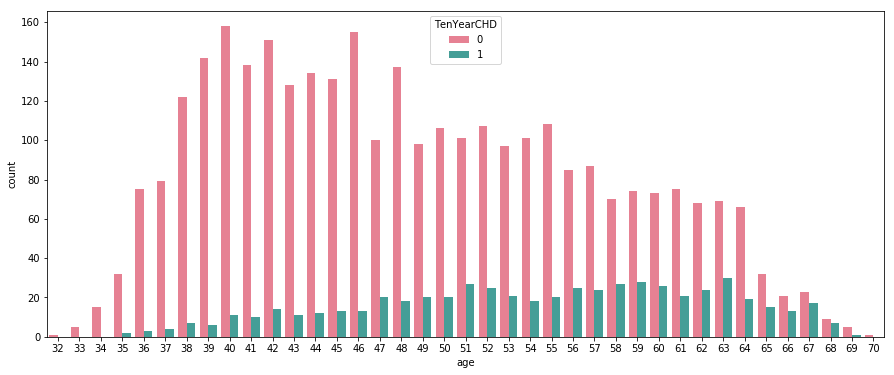

In [8]:

plt.figure(figsize=(15,6))
sns.countplot(x='age',data = data, hue = 'TenYearCHD',palette='husl')
plt.show()

In [9]:
def stacked_barchart(data, title = None, ylabel = None, xlabel = None):
    default_colors = ['#008080', '#5f3c41', '#219AD8']
    # From raw value to percentage
    totals = data.sum(axis=1)
    bars = ((data.T / totals) * 100).T
    r = list(range(data.index.size))

    # Plot
    barWidth = 0.95
    names = data.index.tolist()
    bottom = [0] * bars.shape[0]

    # Create bars
    color_index = 0
    plots = []
    for bar in bars.columns:
        plots.append(plt.bar(r, bars[bar], bottom=bottom, color=default_colors[color_index], edgecolor='white', width=barWidth))
        bottom = list(map(add, bottom, bars[bar]))
        color_index = 0 if color_index >= len(default_colors) else color_index + 1

    # Custom x axis
    plt.title(title)
    plt.xticks(r, names)
    plt.xlabel(data.index.name if xlabel is None else xlabel)
    plt.ylabel(data.columns.name if ylabel is None else ylabel)
    ax = plt.gca()
        
    y_labels = ax.get_yticks()
    ax.set_yticklabels([str(y) + '%' for y in y_labels])

    flat_list = [item for sublist in data.T.values for item in sublist]
    for i, d in zip(ax.patches, flat_list):
        data_label = str(d) + " (" + str(round(i.get_height(), 2)) + "%)"
        ax.text(i.get_x() + 0.45, i.get_y() + 5, data_label, horizontalalignment='center', verticalalignment='center', fontdict = dict(color = 'white', size = 20))

    for item in ([ax.title]):
        item.set_fontsize(27)
        
    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(24)
    
    legend = ax.legend(plots, bars.columns.tolist(), fancybox=True)
    plt.setp(legend.get_texts(), fontsize='20')

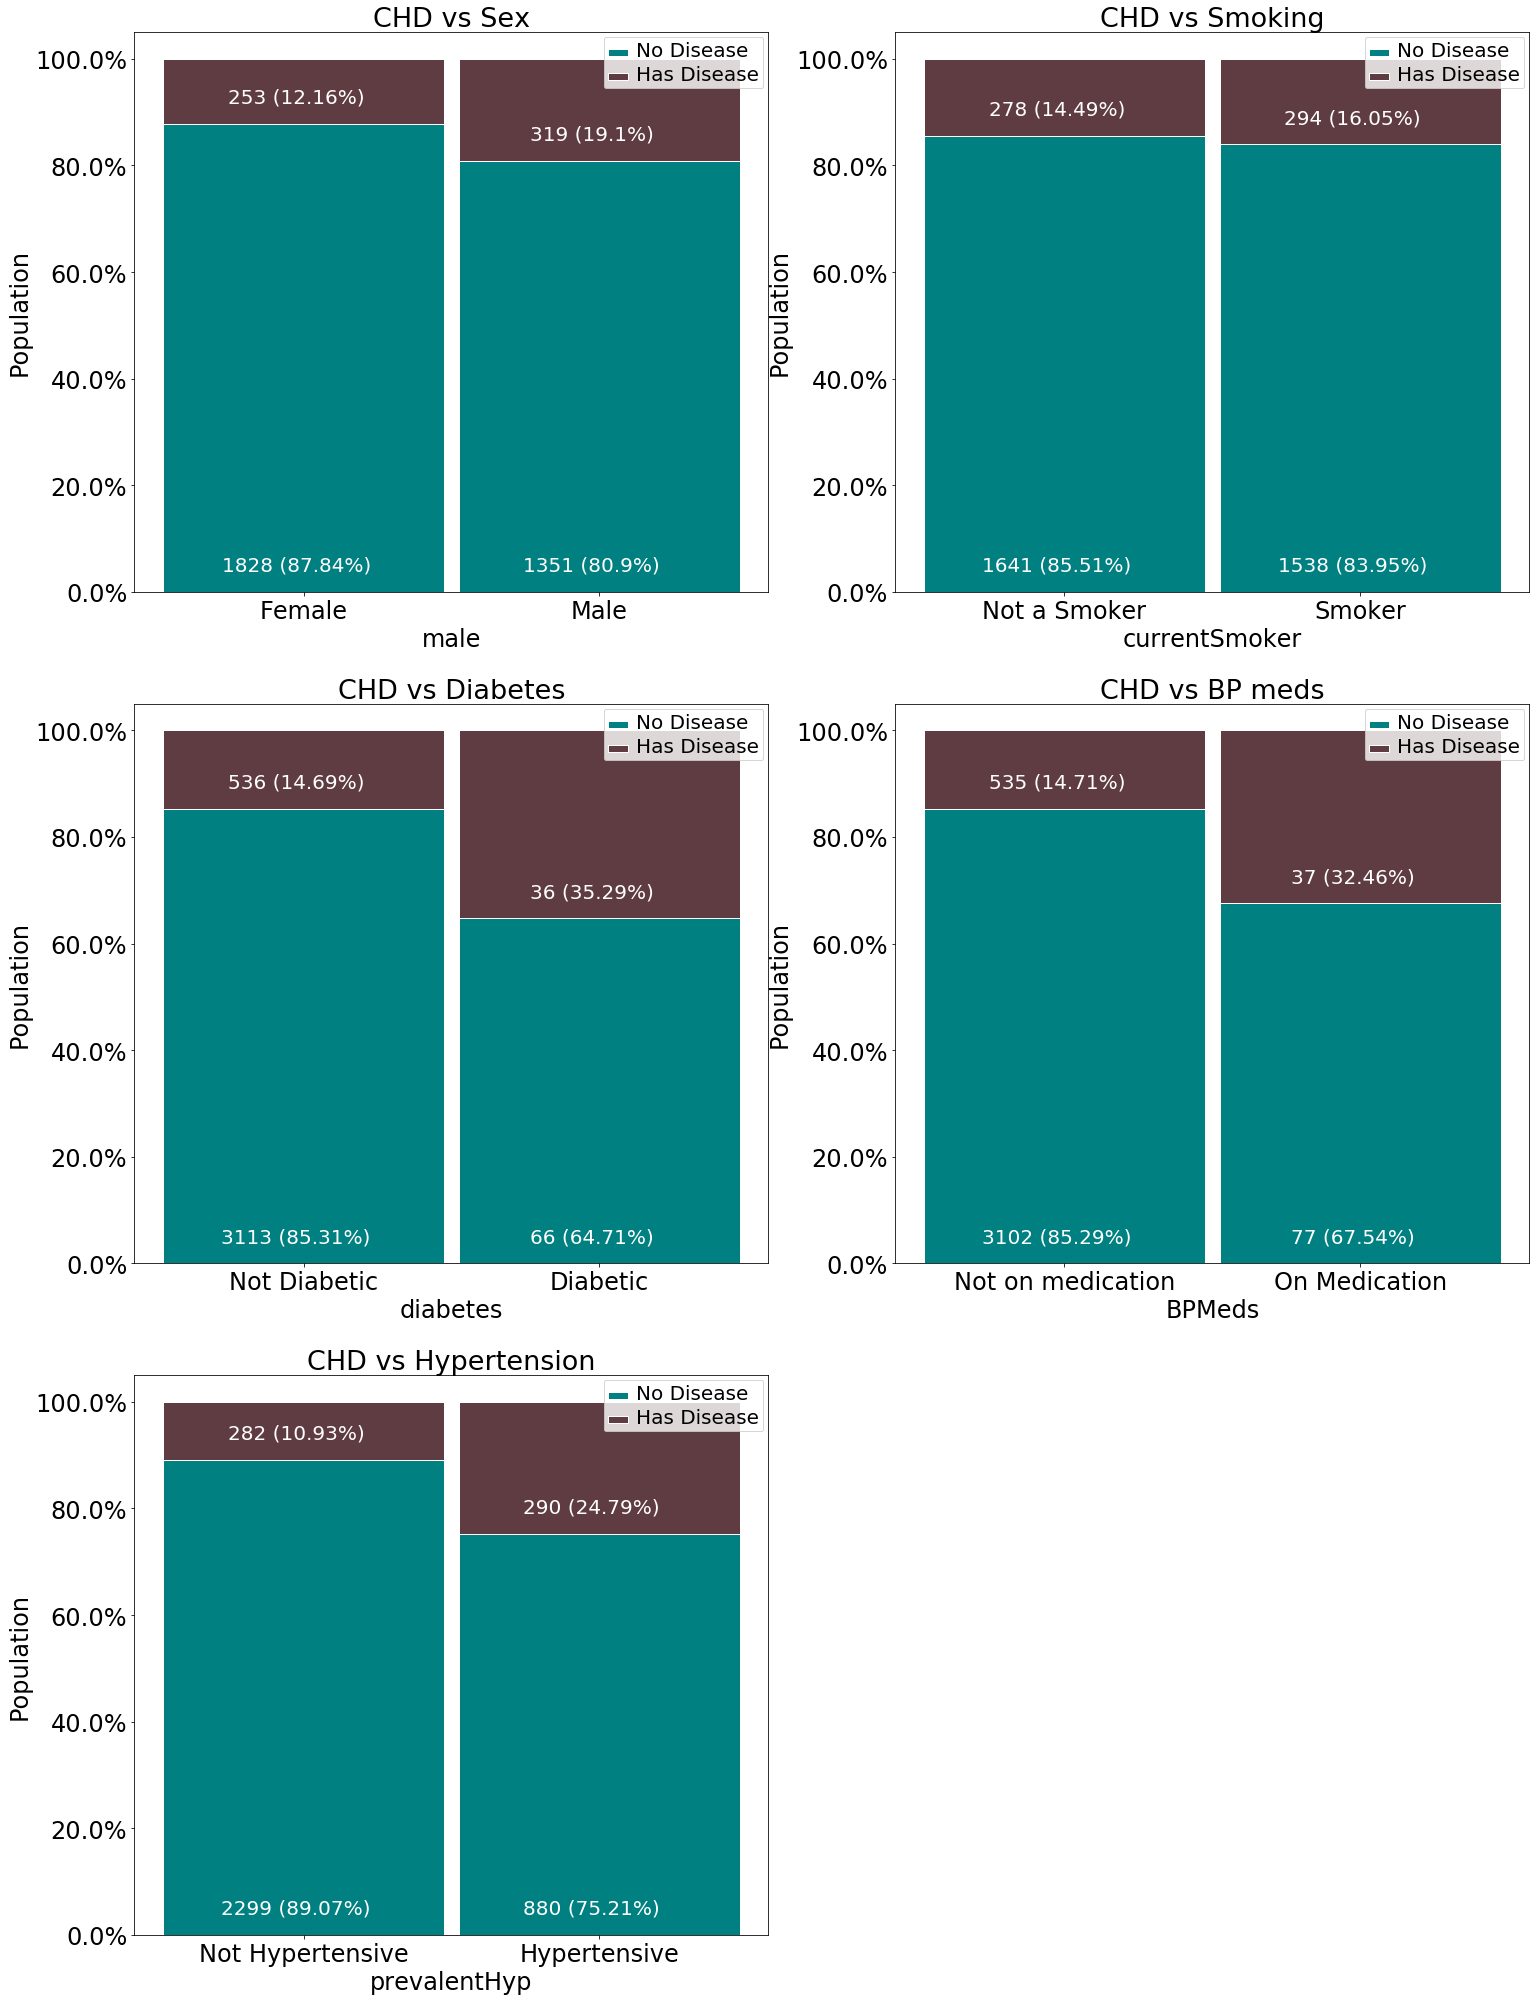

In [10]:
fig = plt.gcf()
fig.set_size_inches(25, 35)
grid_rows = 3
grid_cols = 2

#draw sex vs disease outcome
plt.subplot(grid_rows, grid_cols, 1)
temp = data[['male','TenYearCHD']].groupby(['male','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Female', 1:'Male'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Sex', ylabel = 'Population')

#draw smoking satus vs disease outcome
plt.subplot(grid_rows, grid_cols, 2)
temp = data[['currentSmoker','TenYearCHD']].groupby(['currentSmoker','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not a Smoker', 1:'Smoker'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Smoking', ylabel = 'Population')

#draw diabetes vs disease outcome
plt.subplot(grid_rows, grid_cols, 3)
temp = data[['diabetes','TenYearCHD']].groupby(['diabetes','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not Diabetic', 1:'Diabetic'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Diabetes', ylabel = 'Population')

#draw BP meds vs disease outcome
plt.subplot(grid_rows, grid_cols, 4)
temp = data[['BPMeds','TenYearCHD']].groupby(['BPMeds','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not on medication', 1:'On Medication'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs BP meds', ylabel = 'Population')

#draw Hypertension vs disease outcome
plt.subplot(grid_rows, grid_cols, 5)
temp = data[['prevalentHyp','TenYearCHD']].groupby(['prevalentHyp','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not Hypertensive', 1:'Hypertensive'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Hypertension', ylabel = 'Population')

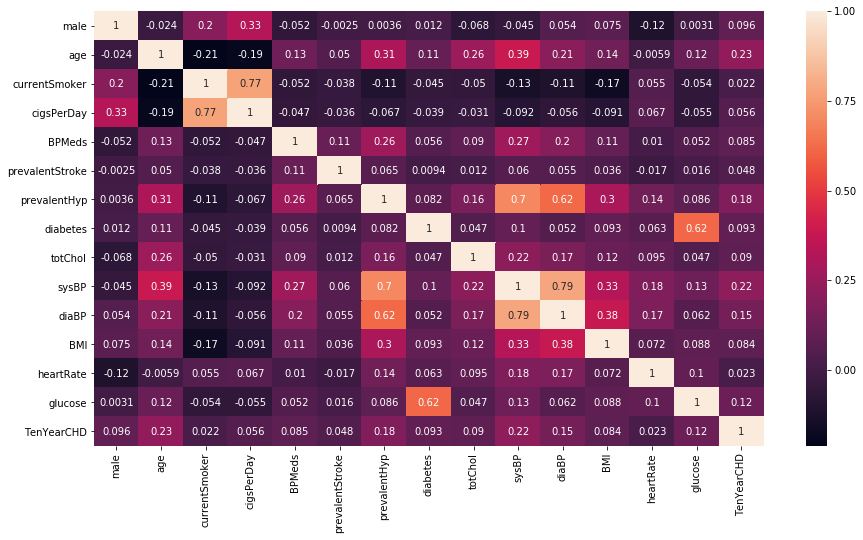

In [11]:

plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [12]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [13]:
#define the features
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='balanced')

# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2)
 
# find all relevant features
feat_selector.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	9
Iteration:

BorutaPy(alpha=0.05,
     estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=28, n_jobs=-1, oob_score=False,
            random_state=<mtrand.RandomState object at 0x0000029B3BDDBDC8>,
            verbose=0, warm_start=False),
     max_iter=100, n_estimators='auto', perc=100,
     random_state=<mtrand.RandomState object at 0x0000029B3BDDBDC8>,
     two_step=True, verbose=2)

In [14]:

# show the most important features
most_important = data.columns[:-1][feat_selector.support_].tolist()
most_important

['age', 'sysBP']

In [15]:

# select the top 6 features
top_features = data.columns[:-1][feat_selector.ranking_ <=6].tolist()
top_features

['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [16]:
import statsmodels.api as sm

In [17]:

X_top = data[top_features]
y = data['TenYearCHD']

In [18]:

res = sm.Logit(y,X_top).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.416958
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3744
Method:                           MLE   Df Model:                            6
Date:                Mon, 15 Feb 2021   Pseudo R-squ.:                 0.02354
Time:                        22:39:27   Log-Likelihood:                -1564.0
converged:                       True   LL-Null:                       -1601.7
                                        LLR p-value:                 3.174e-14
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0223      0.006      3.982      0.000       0.011       0.033
totChol       -0.0029      0.001     -2.716      0.007      -0.005      -0.001
sysBP          0.0245      0.003      7.436      0.000       0.018       0.031
diaBP         -0.0270      0.006     -4.603      0.000      -0.038      -0.015
BMI           -0.0499      0.012     -4.185      0.000      -0.073      -0.027
heartRate     -0.0298      0.004     -8.064      0.000      -0.037      -0.023
glucose        0.0043      0.002      2.616      0.009       0.001       0.007
==============================================================================
"""

In [19]:

params = res.params
conf = res.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                 5%       95%  Odds Ratio
age        1.011381  1.033813    1.022536
totChol    0.994963  0.999184    0.997071
sysBP      1.018236  1.031493    1.024843
diaBP      0.962258  0.984627    0.973378
BMI        0.929304  0.973798    0.951291
heartRate  0.963690  0.977730    0.970685
glucose    1.001074  1.007518    1.004291


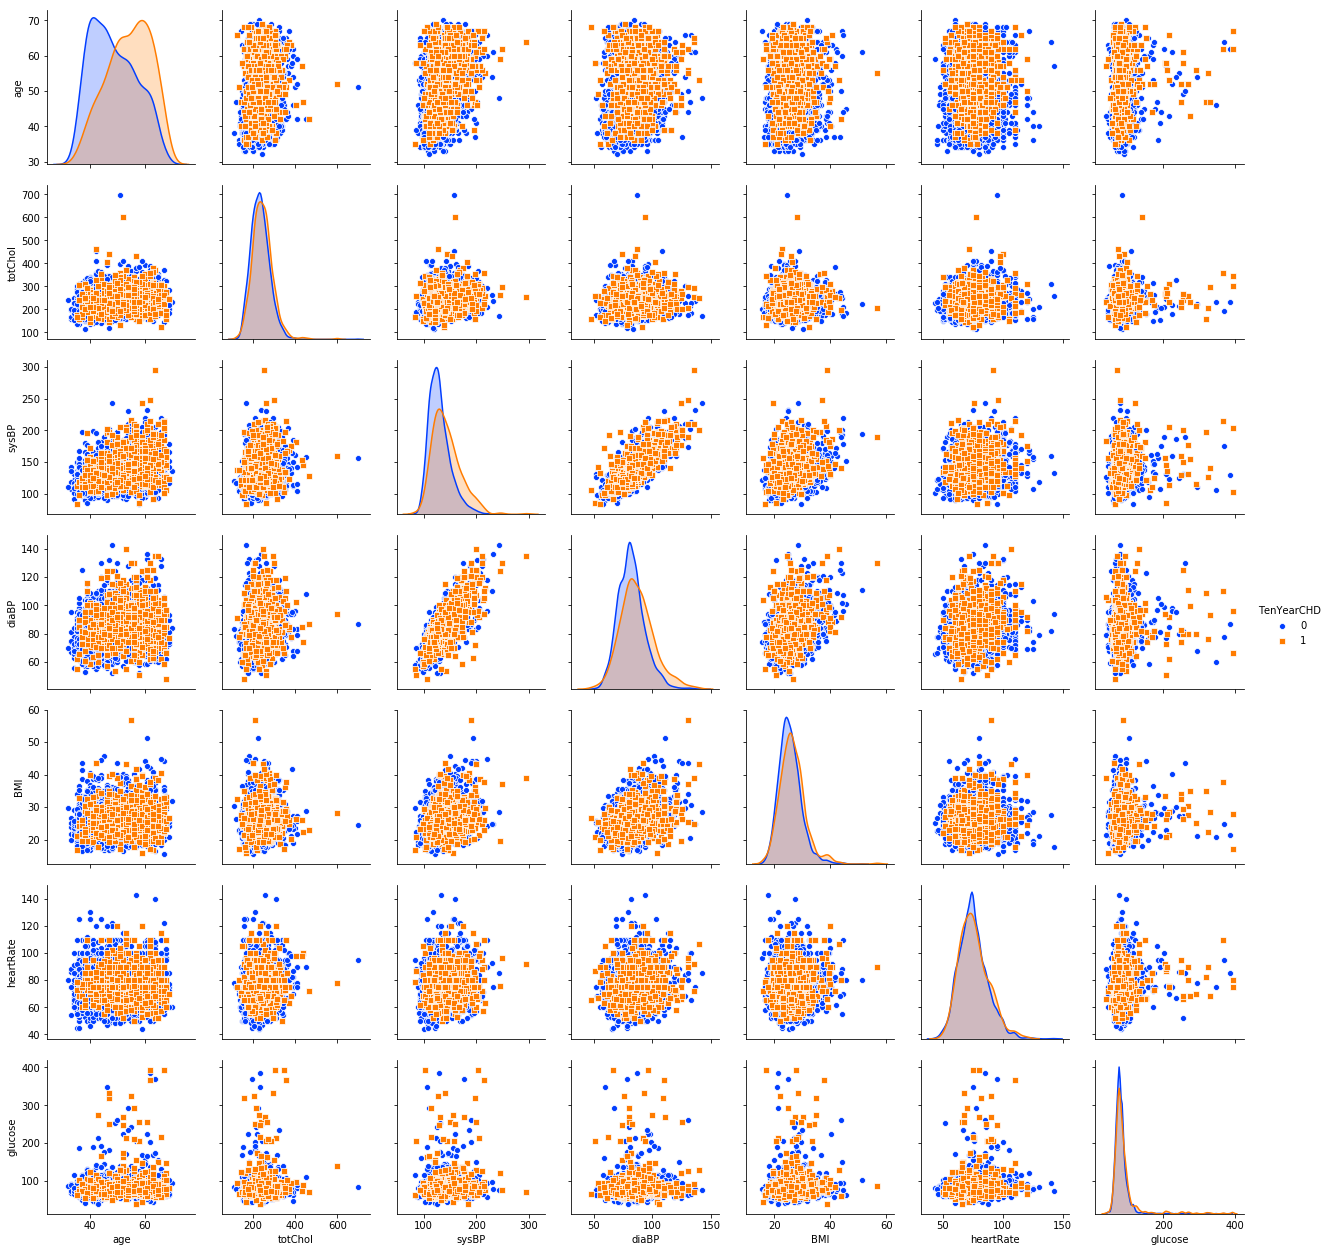

In [20]:
sns.pairplot(data, hue = 'TenYearCHD', markers=["o", "s"], vars = top_features, palette = sns.color_palette("bright", 10))

In [25]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [26]:

X = data[top_features]
y = data.iloc[:,-1]

In [28]:
# the numbers before smote
num_before = dict(Counter(y))

#perform smoting

# define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X, y)


#the numbers after smote
num_after =dict(Counter(y_smote))

AttributeError: 'Pipeline' object has no attribute '_iter'

In [29]:

print(num_before, num_after)

{0: 3179, 1: 572} {0: 3178, 1: 2543}


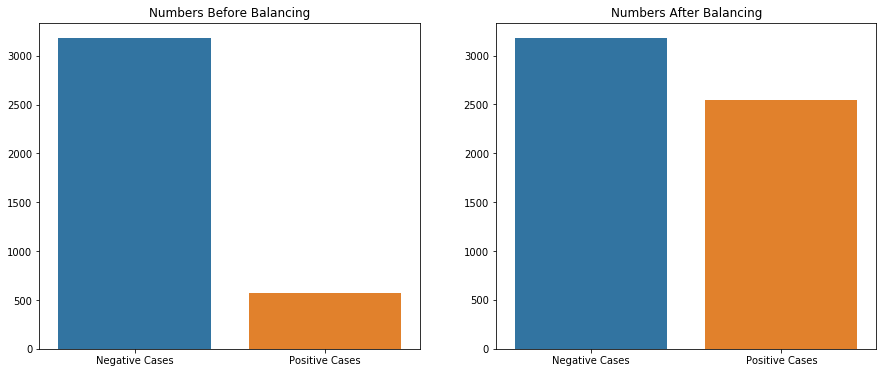

In [30]:
labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(labels, list(num_before.values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(labels, list(num_after.values()))
plt.title("Numbers After Balancing")
plt.show()

In [31]:
# new dataset
new_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
new_data.columns = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose','TenYearCHD']
new_data.head()

,age,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,44,242.0,124.0,72.5,23.07,67.0,83.0,0
1,46,305.0,150.0,88.0,26.82,75.0,75.0,0
2,43,257.0,160.0,85.0,21.95,100.0,84.0,0
3,48,309.0,136.0,90.0,26.83,70.0,75.0,0
4,38,180.0,123.0,69.0,22.70,72.0,70.0,0


In [32]:
X_new = new_data[top_features]
y_new= new_data.iloc[:,-1]
X_new.head()

,age,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,44,242.0,124.0,72.5,23.07,67.0,83.0
1,46,305.0,150.0,88.0,26.82,75.0,75.0
2,43,257.0,160.0,85.0,21.95,100.0,84.0
3,48,309.0,136.0,90.0,26.83,70.0,75.0
4,38,180.0,123.0,69.0,22.70,72.0,70.0


In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=.2,random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

In [37]:
# search for optimun parameters using gridsearch
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10)

In [38]:

#train the classifier
logistic_clf.fit(X_train,y_train)

logistic_clf.best_params_

{'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2'}

In [39]:
#make predictions
logistic_predict = logistic_clf.predict(X_test)


In [40]:

log_accuracy = accuracy_score(y_test,logistic_predict)
print(f"Using logistic regression we get an accuracy of {round(log_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 68.03%


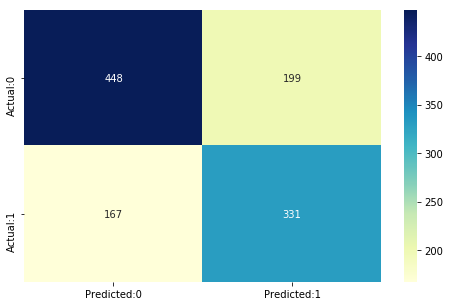

In [41]:
cm=confusion_matrix(y_test,logistic_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [42]:
print(classification_report(y_test,logistic_predict))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       647
           1       0.62      0.66      0.64       498

    accuracy                           0.68      1145
   macro avg       0.68      0.68      0.68      1145
weighted avg       0.68      0.68      0.68      1145



In [43]:

logistic_f1 = f1_score(y_test, logistic_predict)
print(f'The f1 score for logistic regression is {round(logistic_f1*100,2)}%')

The f1 score for logistic regression is 64.4%


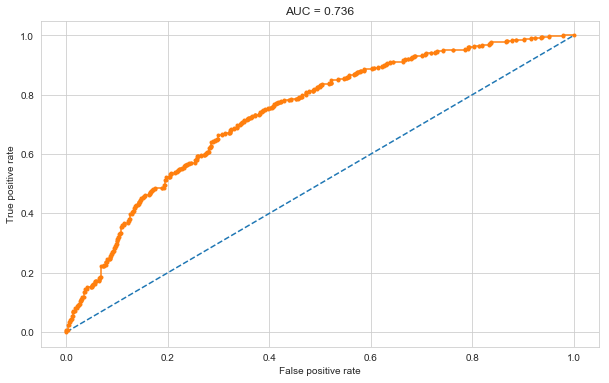

In [44]:
# ROC curve and AUC 
probs = logistic_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:

# search for optimun parameters using gridsearch
params= {'n_neighbors': np.arange(1, 10)}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params, 
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
knn_clf = GridSearchCV(KNeighborsClassifier(),params,cv=3, n_jobs=-1)

In [47]:

# train the model
knn_clf.fit(X_train,y_train)
knn_clf.best_params_

{'n_neighbors': 1}

In [48]:

# predictions
knn_predict = knn_clf.predict(X_test)

In [49]:
#accuracy
knn_accuracy = accuracy_score(y_test,knn_predict)
print(f"Using k-nearest neighbours we get an accuracy of {round(knn_accuracy*100,2)}%")

Using k-nearest neighbours we get an accuracy of 83.23%


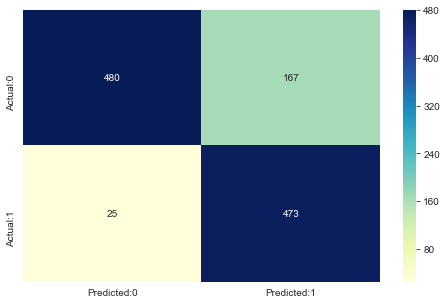

In [50]:

cm=confusion_matrix(y_test,knn_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [51]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.95      0.74      0.83       647
           1       0.74      0.95      0.83       498

    accuracy                           0.83      1145
   macro avg       0.84      0.85      0.83      1145
weighted avg       0.86      0.83      0.83      1145



In [52]:

knn_f1 = f1_score(y_test, knn_predict)
print(f'The f1 score for K nearest neignbours is {round(knn_f1*100,2)}%')

The f1 score for K nearest neignbours is 83.13%


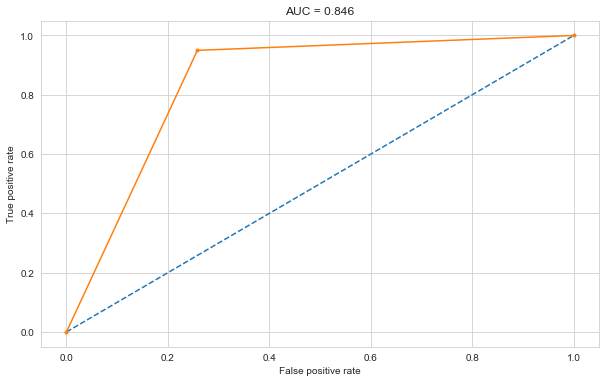

In [53]:
# ROC curve and AUC 
probs = knn_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(knn_auc,3)}")
plt.show()

In [54]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=7)

In [55]:
# grid search for optimum parameters
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_clf = GridSearchCV(dtree, param_grid=params, n_jobs=-1)

In [56]:

# train the model
tree_clf.fit(X_train,y_train)
tree_clf.best_params_

{'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}

In [57]:

# predictions
tree_predict = tree_clf.predict(X_test)

In [58]:
#accuracy
tree_accuracy = accuracy_score(y_test,tree_predict)
print(f"Using Decision Trees we get an accuracy of {round(tree_accuracy*100,2)}%")

Using Decision Trees we get an accuracy of 74.41%


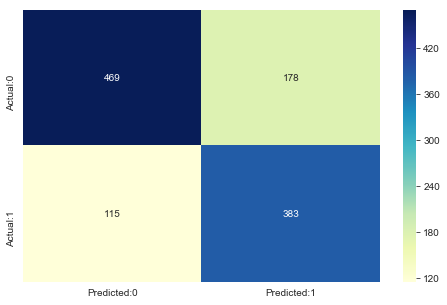

In [59]:
cm=confusion_matrix(y_test,tree_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [60]:
print(classification_report(y_test,tree_predict))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76       647
           1       0.68      0.77      0.72       498

    accuracy                           0.74      1145
   macro avg       0.74      0.75      0.74      1145
weighted avg       0.75      0.74      0.75      1145



In [61]:

tree_f1 = f1_score(y_test, tree_predict)
print(f'The f1 score Descision trees is {round(tree_f1*100,2)}%')

The f1 score Descision trees is 72.33%


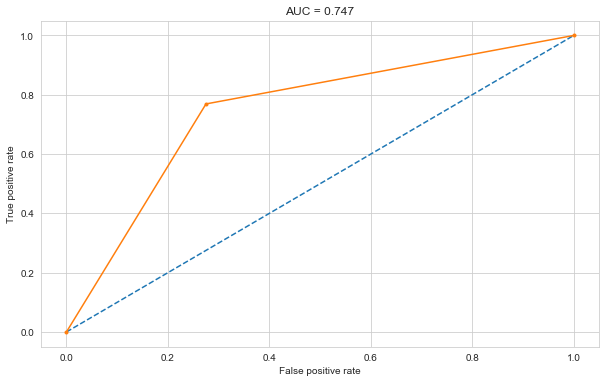

In [62]:

# ROC curve and AUC 
probs = tree_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
tree_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(tree_auc,3)}")
plt.show()

In [63]:
from sklearn.svm import SVC

In [64]:
#grid search for optimum parameters
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)

In [65]:
# train the model
svm_clf.fit(X_train,y_train)
svm_clf.best_params_

{'C': 10, 'gamma': 1}

In [66]:
# predictions
svm_predict = svm_clf.predict(X_test)

In [67]:
#accuracy
svm_accuracy = accuracy_score(y_test,svm_predict)
print(f"Using SVM we get an accuracy of {round(svm_accuracy*100,2)}%")

Using SVM we get an accuracy of 86.46%


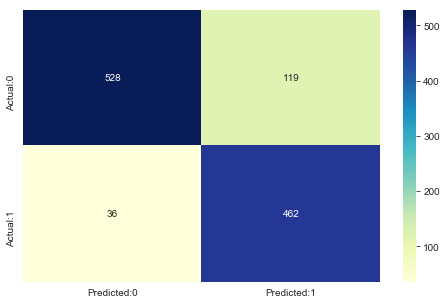

In [68]:
cm=confusion_matrix(y_test,svm_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [69]:

print(classification_report(y_test,svm_predict))

              precision    recall  f1-score   support

           0       0.94      0.82      0.87       647
           1       0.80      0.93      0.86       498

    accuracy                           0.86      1145
   macro avg       0.87      0.87      0.86      1145
weighted avg       0.87      0.86      0.87      1145



In [70]:
svm_f1 = f1_score(y_test, svm_predict)
print(f'The f1 score for SVM is {round(svm_f1*100,2)}%')

The f1 score for SVM is 85.63%


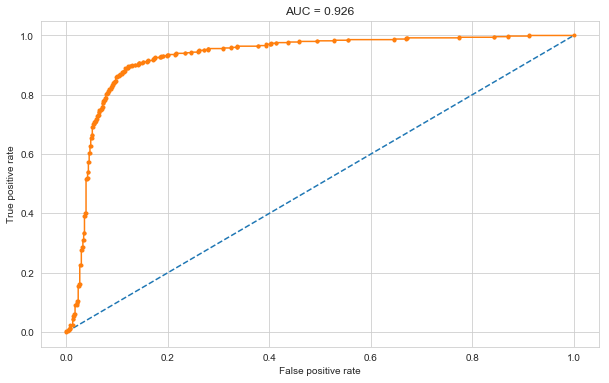

In [71]:
# ROC curve and AUC 
probs = svm_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(svm_auc,3)}")
plt.show()

In [72]:
comparison = pd.DataFrame({
    "Logistic regression":{'Accuracy':log_accuracy, 'AUC':log_auc, 'F1 score':logistic_f1},
    "K-nearest neighbours":{'Accuracy':knn_accuracy, 'AUC':knn_auc, 'F1 score':knn_f1},
    "Decision trees":{'Accuracy':tree_accuracy, 'AUC':tree_auc, 'F1 score':tree_f1},
    "Support vector machine":{'Accuracy':svm_accuracy, 'AUC':svm_auc, 'F1 score':svm_f1}
}).T

In [73]:

comparison

,AUC,Accuracy,F1 score
Logistic regression,0.736091,0.680349,0.643969
K-nearest neighbours,0.845842,0.832314,0.831283
Decision trees,0.746980,0.744105,0.723324
Support vector machine,0.926012,0.864629,0.856348


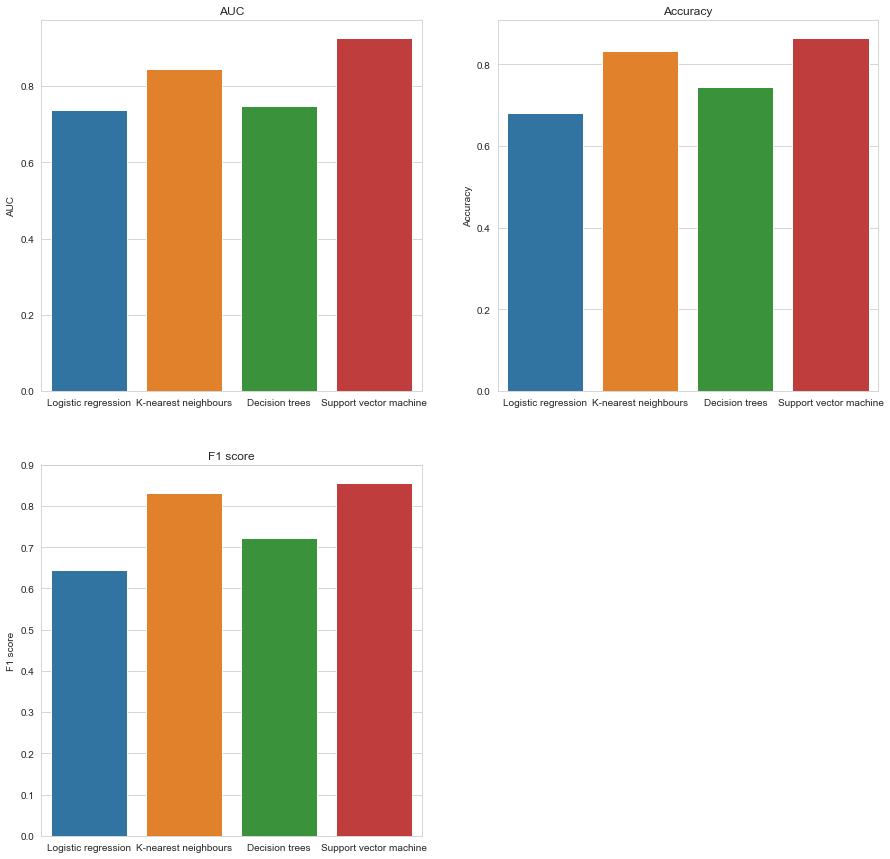

In [74]:

fig = plt.gcf()
fig.set_size_inches(15, 15)
titles = ['AUC','Accuracy','F1 score']
for title,label in enumerate(comparison.columns):
    plt.subplot(2,2,title+1)
    sns.barplot(x=comparison.index, y = comparison[label], data=comparison)
    plt.xticks(fontsize=10)
    plt.title(titles[title])
plt.show()

In [76]:
svm_clf.predict([[20,325,300,100.0,25,86,180]])

array([0], dtype=int64)